# Results of applying various statistical models to real planet data

Three statistical models were applied to various datasets of planets. These models include:
- 1 component model ($\gamma$, $x_l$, $x_u$)
- 2 component overlapping model ($\theta_{1,2}$, $\gamma_{1,2}$, $x_{l,1}$, $x{l,2}$, $x_u$)

Made graphical below.

In [1]:
import daft
import numpy as np
import pylab as plt
%matplotlib inline

(0.10000000000000001, 0.40000000000000002)


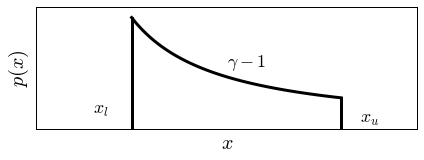

In [2]:
def powerlaw(xlist):
    return xlist**(-1.1)

xl = 2.5
xu = 8.
xs = np.linspace(xl,xu,100)

plt.axes(aspect=8)
plt.xlim(0., xu+2)
plt.plot(xs, powerlaw(xs), linewidth=3, color='black')

ylims = plt.ylim()
plt.ylim(0.,ylims[1])
plt.axvline(xl, 0., powerlaw(xl)/ylims[1], linewidth=3, color='black')
plt.axvline(xu, 0., powerlaw(xu)/ylims[1], linewidth=3, color='black')

plt.text(xl-1, 0.05, r"$x_l$", fontsize=18)
plt.text(xu+0.5, 0.02, r"$x_u$", fontsize=18)
plt.text(5, powerlaw(5)*1.2, r"$\gamma-1$", fontsize=18)

plt.xticks([])
plt.yticks([])
plt.ylabel(r"$p(x)$", fontsize=20)
plt.xlabel(r"$x$", fontsize=20)

print(ylims)
plt.tight_layout()
plt.savefig("figures/pgm_1comp_ex.eps", dpi=300)
plt.show()

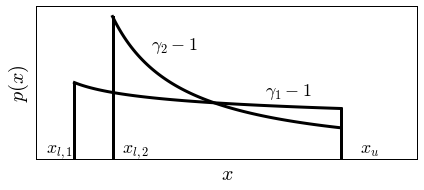

In [3]:
def powerlaw_1(xlist):
    return 0.25*xlist**(-0.2)

def powerlaw_2(xlist):
    return xlist**(-1.1)

xl1 = 1.
xl2 = 2.
xu = 8.
xs_1 = np.linspace(xl1,xu,100)
xs_2 = np.linspace(xl2,xu,100)

plt.axes(aspect=8)
plt.xlim(0., xu+2)
plt.plot(xs_1, powerlaw_1(xs_1), linewidth=3, color='black')
plt.plot(xs_2, powerlaw_2(xs_2), linewidth=3, color='black')

ylims = plt.ylim()
plt.ylim(0.,ylims[1])
plt.axvline(xl1, 0., powerlaw_1(xl1)/ylims[1], linewidth=3, color='black')
plt.axvline(xl2, 0., powerlaw_2(xl2)/ylims[1], linewidth=3, color='black')
plt.axvline(xu, 0., powerlaw_1(xu)/ylims[1], linewidth=3, color='black')

plt.text(xl1-0.75, 0.02, r"$x_{l,1}$", fontsize=18)
plt.text(xl2+0.25, 0.02, r"$x_{l,2}$", fontsize=18)
plt.text(xu+0.5, 0.02, r"$x_u$", fontsize=18)
plt.text(6.0, powerlaw_1(6.0)*1.2, r"$\gamma_1-1$", fontsize=18)
plt.text(3.0, powerlaw_2(3.0)*1.2, r"$\gamma_2-1$", fontsize=18)

plt.xticks([])
plt.yticks([])
plt.ylabel(r"$p(x)$", fontsize=20)
plt.xlabel(r"$x$", fontsize=20)

plt.tight_layout()
plt.savefig("figures/pgm_2comp_overlap_ex.eps", dpi=300)
plt.show()

In [4]:
from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)

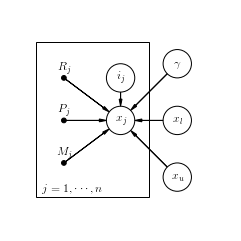

In [5]:
# Instantiate the PGM.
pgm = daft.PGM([4.0, 4.0])

# Latent variables
pgm.add_node(daft.Node("xn", r"$x_j$", 2, 2))

# Data.
pgm.add_node(daft.Node("Rn", r"$R_j$", 1, 2.75, fixed=True))
pgm.add_node(daft.Node("pn", r"$P_j$", 1, 2.00, fixed=True))
pgm.add_node(daft.Node("Mn", r"$M_j$", 1, 1.25, fixed=True))

pgm.add_node(daft.Node("in", r"$i_j$", 2, 2.75))

# Hierarchical variables
pgm.add_node(daft.Node("gamma", r"$\gamma$", 3, 3))
pgm.add_node(daft.Node("xl", r"$x_l$", 3, 2))
pgm.add_node(daft.Node("xu", r"$x_u$", 3, 1))


# Add in the edges.

pgm.add_edge("Rn", "xn")
pgm.add_edge("pn", "xn")
pgm.add_edge("Mn", "xn")
pgm.add_edge("in", "xn")

pgm.add_edge("gamma", "xn")
pgm.add_edge("xl", "xn")
pgm.add_edge("xu", "xn")


# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.75, 2, 2.625], label=r"$j = 1, \cdots, n$",
    shift=-0.1))

pgm.render()
pgm.figure.savefig("figures/pgm_1comp.eps")

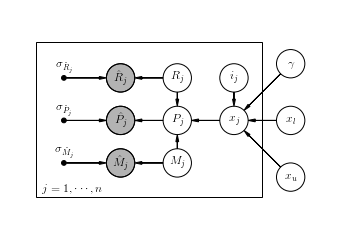

In [6]:
# Instantiate the PGM.
pgm = daft.PGM([6.0, 4.0])

# Latent variables
pgm.add_node(daft.Node("in", r"$i_j$", 4, 2.75))
pgm.add_node(daft.Node("xn", r"$x_j$", 4, 2.00))

pgm.add_node(daft.Node("Rn", r"$R_j$", 3, 2.75))
pgm.add_node(daft.Node("pn", r"$P_j$", 3, 2.00))
pgm.add_node(daft.Node("Mn", r"$M_j$", 3, 1.25))

# Hierarchical variables
pgm.add_node(daft.Node("gamma", r"$\gamma$", 5, 3))
pgm.add_node(daft.Node("xl", r"$x_l$", 5, 2))
pgm.add_node(daft.Node("xu", r"$x_u$", 5, 1))

# Data
pgm.add_node(daft.Node("Rnhat", r"$\hat{R}_j$", 2, 2.75, observed=True))
pgm.add_node(daft.Node("pnhat", r"$\hat{P}_j$", 2, 2.00, observed=True))
pgm.add_node(daft.Node("Mnhat", r"$\hat{M}_j$", 2, 1.25, observed=True))

pgm.add_node(daft.Node("sigmaRn", r"$\sigma_{\hat{R}_j}$", 1, 2.75, fixed=True))
pgm.add_node(daft.Node("sigmapn", r"$\sigma_{\hat{P}_j}$", 1, 2.00, fixed=True))
pgm.add_node(daft.Node("sigmaMn", r"$\sigma_{\hat{M}_j}$", 1, 1.25, fixed=True))


# Add in the edges.
pgm.add_edge("Rn", "pn")
pgm.add_edge("xn", "pn")
pgm.add_edge("Mn", "pn")
pgm.add_edge("in", "xn")

pgm.add_edge("Rn", "Rnhat")
pgm.add_edge("pn", "pnhat")
pgm.add_edge("Mn", "Mnhat")

pgm.add_edge("sigmaRn", "Rnhat")
pgm.add_edge("sigmapn", "pnhat")
pgm.add_edge("sigmaMn", "Mnhat")

pgm.add_edge("gamma", "xn")
pgm.add_edge("xl", "xn")
pgm.add_edge("xu", "xn")


# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.75, 4, 2.625], label=r"$j = 1, \cdots, n$",
    shift=-0.1))

# Render and save.

pgm.render()
pgm.figure.savefig("figures/pgm_1comp_sigmas.eps")

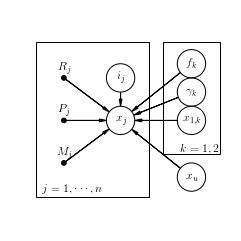

In [7]:
# Instantiate the PGM.
pgm = daft.PGM([4.0, 4.0])

# Latent variables
pgm.add_node(daft.Node("xn", r"$x_j$", 2, 2))

# Data.
pgm.add_node(daft.Node("Rn", r"$R_j$", 1, 2.75, fixed=True))
pgm.add_node(daft.Node("pn", r"$P_j$", 1, 2.00, fixed=True))
pgm.add_node(daft.Node("Mn", r"$M_j$", 1, 1.25, fixed=True))

pgm.add_node(daft.Node("in", r"$i_j$", 2, 2.75))

# Hierarchical variables
pgm.add_node(daft.Node("f", r"$f_k$", 3.25, 3.0))
pgm.add_node(daft.Node("gamma", r"$\gamma_k$", 3.25, 2.5))
pgm.add_node(daft.Node("xl", r"$x_{1,k}$", 3.25, 2.0))
pgm.add_node(daft.Node("xu", r"$x_u$", 3.25, 1.0))


# Add in the edges.
pgm.add_edge("Rn", "xn")
pgm.add_edge("pn", "xn")
pgm.add_edge("Mn", "xn")
pgm.add_edge("in", "xn")

pgm.add_edge("f", "xn")
pgm.add_edge("gamma", "xn")
pgm.add_edge("xl", "xn")
pgm.add_edge("xu", "xn")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.75, 2, 2.625], label=r"$j = 1, \cdots, n$",
    shift=-0.1))

pgm.add_plate(daft.Plate([2.75, 1.5, 1.0, 1.875], label=r"$k = 1, 2$", 
    label_offset=[17.,3.], shift=-0.1))
# Render and save.

pgm.render()
pgm.figure.savefig("figures/pgm_2comp_overlap.eps")

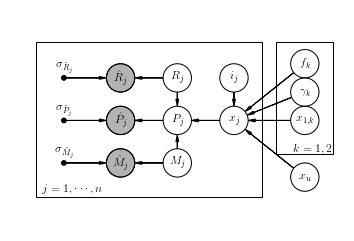

In [8]:
# Instantiate the PGM.
pgm = daft.PGM([6.0, 4.0])

# Latent variables
pgm.add_node(daft.Node("in", r"$i_j$", 4, 2.75))
pgm.add_node(daft.Node("xn", r"$x_j$", 4, 2.00))

pgm.add_node(daft.Node("Rn", r"$R_j$", 3, 2.75))
pgm.add_node(daft.Node("pn", r"$P_j$", 3, 2.00))
pgm.add_node(daft.Node("Mn", r"$M_j$", 3, 1.25))

# Hierarchical variables
pgm.add_node(daft.Node("f", r"$f_k$", 5.25, 3.0))
pgm.add_node(daft.Node("gamma", r"$\gamma_k$", 5.25, 2.5))
pgm.add_node(daft.Node("xl", r"$x_{1,k}$", 5.25, 2.0))
pgm.add_node(daft.Node("xu", r"$x_u$", 5.25, 1.0))

# Data
pgm.add_node(daft.Node("Rnhat", r"$\hat{R}_j$", 2, 2.75, observed=True))
pgm.add_node(daft.Node("pnhat", r"$\hat{P}_j$", 2, 2.00, observed=True))
pgm.add_node(daft.Node("Mnhat", r"$\hat{M}_j$", 2, 1.25, observed=True))

pgm.add_node(daft.Node("sigmaRn", r"$\sigma_{\hat{R}_j}$", 1, 2.75, fixed=True))
pgm.add_node(daft.Node("sigmapn", r"$\sigma_{\hat{P}_j}$", 1, 2.00, fixed=True))
pgm.add_node(daft.Node("sigmaMn", r"$\sigma_{\hat{M}_j}$", 1, 1.25, fixed=True))


# Add in the edges.
pgm.add_edge("Rn", "pn")
pgm.add_edge("xn", "pn")
pgm.add_edge("Mn", "pn")
pgm.add_edge("in", "xn")

pgm.add_edge("Rn", "Rnhat")
pgm.add_edge("pn", "pnhat")
pgm.add_edge("Mn", "Mnhat")

pgm.add_edge("sigmaRn", "Rnhat")
pgm.add_edge("sigmapn", "pnhat")
pgm.add_edge("sigmaMn", "Mnhat")

pgm.add_edge("f", "xn")
pgm.add_edge("gamma", "xn")
pgm.add_edge("xl", "xn")
pgm.add_edge("xu", "xn")


# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.75, 4, 2.625], label=r"$j = 1, \cdots, n$",
    shift=-0.1))

pgm.add_plate(daft.Plate([4.75, 1.5, 1.0, 1.875], label=r"$k = 1, 2$", 
    label_offset=[17.,3.], shift=-0.1))
# Render and save.

pgm.render()
pgm.figure.savefig("figures/pgm_2comp_overlap_sigmas.eps")